## Example - Low Impact Development Model


This example illustrates how the Low Impact Development (LID) modeling feature works. 

The data file represents a 29 acre mixed-use subdivision that has been divided into 9 subcatchments. 

Six different types of LID processes have been defined and deployed within the subcatchments:
- rain barrels and an infiltration trench in subcatchment S1, 
- street planters in S4, 
- a green roof and permeable pavement area in S5, and 
- vegetative swales in subcatchments Swale3, Swale4, and Swale6.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.59'


In [3]:
import matplotlib.pyplot as plt
from swmm_api import SwmmOutput, SwmmReport, SwmmInput
from swmm_api.input_file.macros.plotting_map import add_node_map, add_subcatchment_map, add_node_labels, add_link_labels, add_subcatchments_labels
from swmm_api.run_swmm import swmm5_run_progress
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary

In [5]:
inp = SwmmInput('LID_Model.inp')

In [6]:
inp.SUBCATCHMENTS.frame

rain_gage  outlet  area  imperviousness   width  slope  curb_length  \
name                                                                         
S1      RainGage  Swale4  4.55            56.8  1587.0    2.0          0.0   
S2      RainGage      O1  4.74            63.0  1653.0    2.0          0.0   
S3      RainGage  Swale3  3.70            39.5  1456.0    3.1          0.0   
S4      RainGage  Swale4  6.82            49.9  2331.0    3.1          0.0   
S5      RainGage      O1  6.60            87.7  1670.0    2.0          0.0   
S6      RainGage  Swale6  2.58             0.0   907.0    3.1          0.0   
Swale3  RainGage  Swale4  0.33             0.0    50.0    0.5          0.0   
Swale4  RainGage  Swale6  0.50             0.0    50.0    0.5          0.0   
Swale6  RainGage      O1  0.41             0.0    50.0    0.5          0.0   

        snow_pack  
name               
S1            NaN  
S2            NaN  
S3            NaN  
S4            NaN  
S5            NaN  
S6            NaN  
Swale3        NaN  
Swale4        NaN  
Swale6        NaN

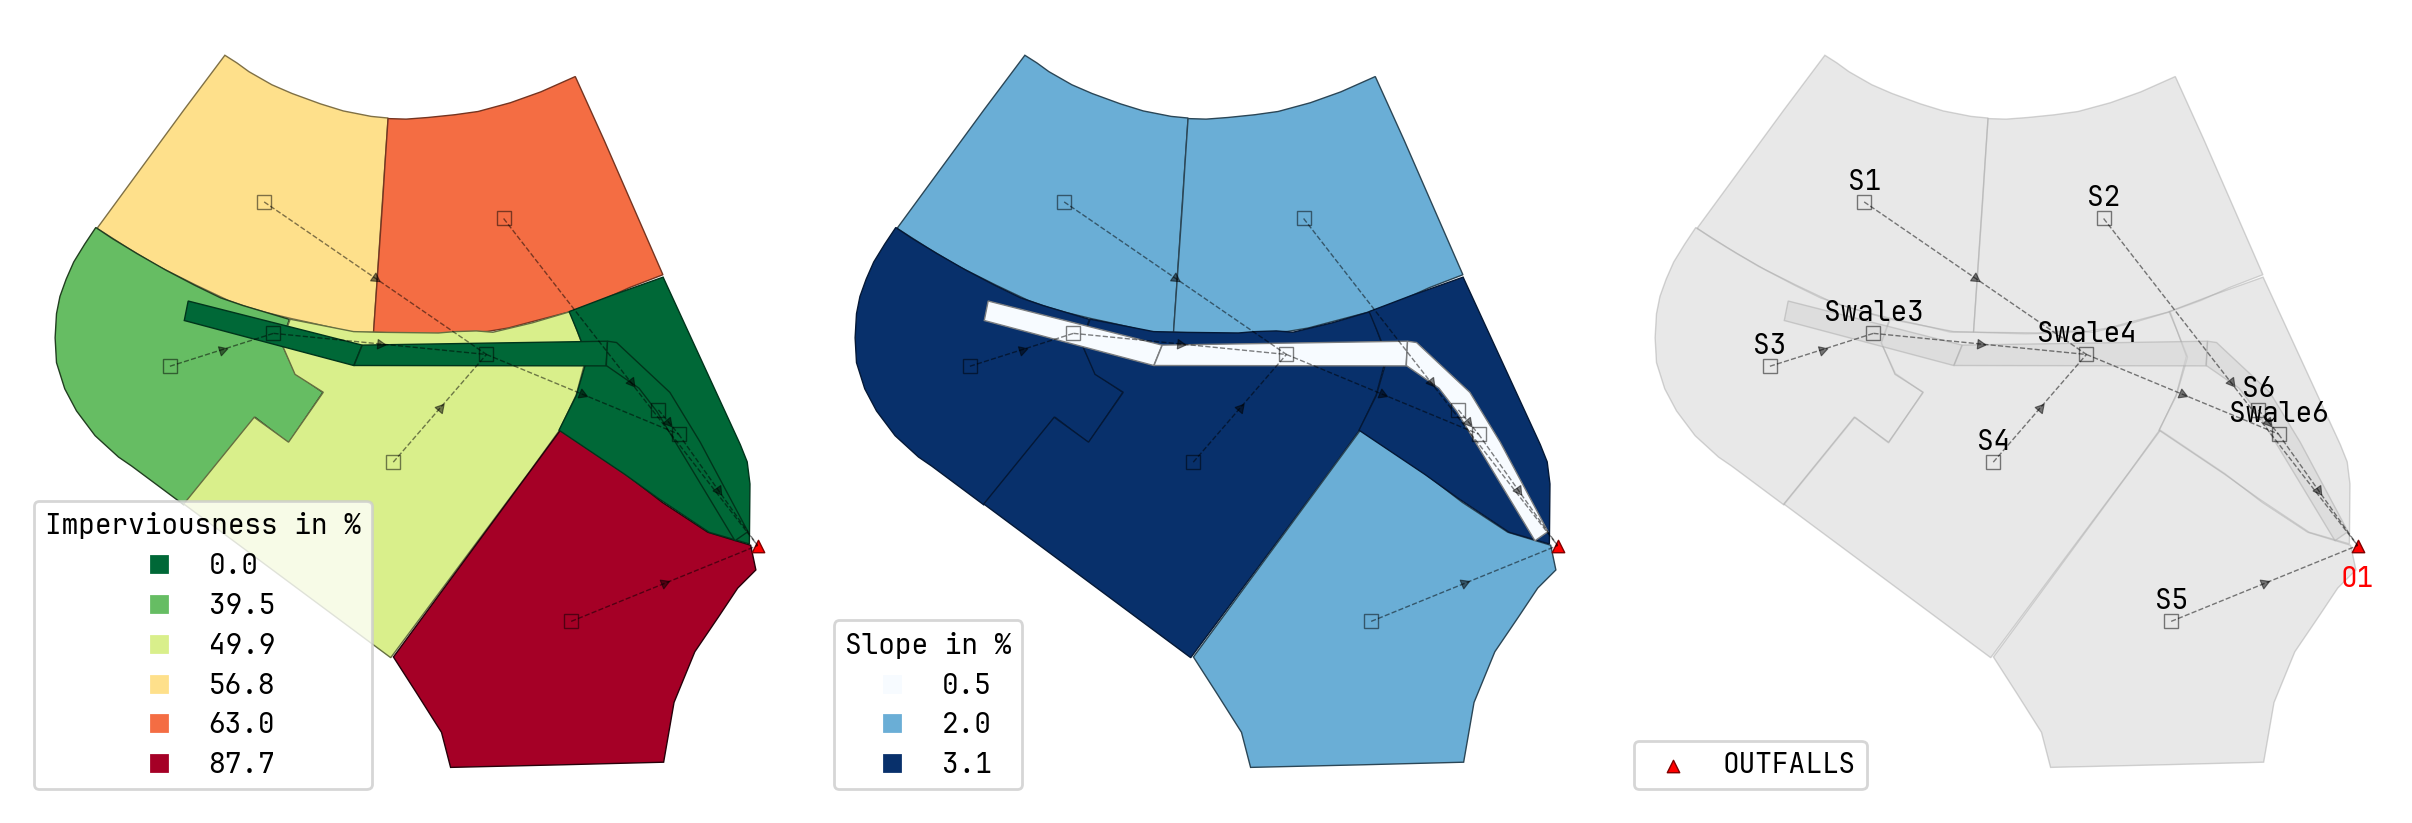

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)

axes[0].set_axis_off()
axes[0].set_aspect('equal')
add_node_map(axes[0], inp, add_kind_legend=False)
add_subcatchment_map(axes[0], inp, add_connector_arrows=True, values_dict={sc.name: sc.imperviousness for sc in inp.SUBCATCHMENTS.values()}, cmap='RdYlGn_r', alpha=1, discrete=True, colorbar_kwargs={'title': 'Imperviousness in %', 'loc': 'lower left'})
# ---
axes[1].set_axis_off()
axes[1].set_aspect('equal')
add_node_map(axes[1], inp, add_kind_legend=False)
add_subcatchment_map(axes[1], inp, add_connector_arrows=True, values_dict={sc.name: sc.slope for sc in inp.SUBCATCHMENTS.values()}, cmap='Blues', alpha=1, colorbar_kwargs={'title': 'Slope in %'}, discrete=True)
# ---
axes[2].set_axis_off()
axes[2].set_aspect('equal')
add_node_map(axes[2], inp)
add_subcatchment_map(axes[2], inp, add_connector_arrows=True)
add_node_labels(axes[2], inp, color='red', y_offset=-80)
add_subcatchments_labels(axes[2], inp, size=10, y_offset=25, color='black')


After loading the example, select the LID Controls category from the Data Browser to see what types of LID controls and their design parameters have been defined for the project. 

Then use the View | Query command to locate subcatchments that have been assigned LID controls or select LID Usage as the Subcatchment Theme to view on the map. 
Bring up the Property Editor for a selected subcatchment and click on the LID Controls property to see how a particular LID process was deployed within the subcatchment.

In [8]:
inp.LID_CONTROLS.keys()

dict_keys(['GreenRoof', 'PorousPave', 'Planters', 'InfilTrench', 'RainBarrels', 'Swale'])

In [9]:
gr = inp.LID_CONTROLS['GreenRoof']
print(gr)
import pprint
pprint.pprint(gr.layer_dict)

LIDControl(name='GreenRoof', lid_kind='BC', layer_dict={'SURFACE': Surface(StorHt=0.0, VegFrac=0.0, Rough=0.1, Slope=1.0, Xslope=5.0), 'SOIL': Soil(Thick=3.0, Por=0.5, FC=0.2, WP=0.1, Ksat=0.5, Kcoeff=10.0, Suct=3.5), 'STORAGE': Storage(Height=1.0, Vratio=0.75, Seepage=0.0, Vclog=0, Covrd=False), 'DRAIN': Drain(Coeff=1.0, Expon=0.5, Offset=0.0, Delay='6', open_level='0', close_level='0', Qcurve=nan)})
{'DRAIN': Drain(Coeff=1.0, Expon=0.5, Offset=0.0, Delay='6', open_level='0', close_level='0', Qcurve=nan),
 'SOIL': Soil(Thick=3.0, Por=0.5, FC=0.2, WP=0.1, Ksat=0.5, Kcoeff=10.0, Suct=3.5),
 'STORAGE': Storage(Height=1.0, Vratio=0.75, Seepage=0.0, Vclog=0, Covrd=False),
 'SURFACE': Surface(StorHt=0.0, VegFrac=0.0, Rough=0.1, Slope=1.0, Xslope=5.0)}


In [10]:
print(inp.LID_CONTROLS['GreenRoof'].to_inp_line())

GreenRoof BC
GreenRoof SURFACE  0 0 0.1 1 5
GreenRoof SOIL     3 0.5 0.2 0.1 0.5 10 3.5
GreenRoof STORAGE  1 0.75 0 0 NO
GreenRoof DRAIN    1 0.5 0 6 0 0



In [11]:
inp.LID_USAGE.frame

n_replicate      area  width  saturation_init  \
subcatchment lid                                                         
S1           InfilTrench           4     532.0  133.0              0.0   
             RainBarrels          32       5.0    0.0              0.0   
S4           Planters             30     500.0    0.0              0.0   
S5           GreenRoof             1   18400.0  136.0              0.0   
             PorousPave            1  232872.0  683.0              0.0   
Swale3       Swale                 1   14374.8   45.0              0.0   
Swale4       Swale                 1   21780.0   45.0              0.0   
Swale6       Swale                 1   17859.6   45.0              0.0   

                          impervious_portion  route_to_pervious fn_lid_report  \
subcatchment lid                                                                
S1           InfilTrench                40.0                  0             *   
             RainBarrels                17.0                  1             *   
S4           Planters                   80.0                  0             *   
S5           GreenRoof                   0.0                  0             *   
             PorousPave                  0.0                  0             *   
Swale3       Swale                       0.0                  0             *   
Swale4       Swale                       0.0                  0             *   
Swale6       Swale                       0.0                  0             *   

                         drain_to from_pervious  
subcatchment lid                                 
S1           InfilTrench        *             0  
             RainBarrels        *             0  
S4           Planters           *             0  
S5           GreenRoof          *             0  
             PorousPave         *             0  
Swale3       Swale              *             0  
Swale4       Swale              *             0  
Swale6       Swale              *             0

Run the example and view a summary of LID performance in the LID Results section of the Summary Report. 

Edit one of the LID units deployed within a subcatchment (e.g., the green roof in subcatchment S5) to produce a detailed report file for it. 

Then re-run the example and open the report file with a text editor (or with Excel) to view a detailed time history of water fluxes and storage levels in the LID unit.

In [12]:
inp.LID_USAGE[('S5', 'GreenRoof')].fn_lid_report = 'lid_report_export.txt'

In [13]:
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport
    lid_rpt = res.lid_rpt_dict

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmplaqrqfq9/example_run_swmm.inp:   0%|          | 0/10…

In [14]:
rpt.lid_control_summary

LID  Control  No. of_Units  Unit_Area  Unit_Width  \
Subcatchment                                                              
S1            RainBarrels       32           5.0        0.0        0.08   
S1            InfilTrench        4         532.0      133.0        1.07   
S4               Planters       30         500.0        0.0        5.05   
S5              GreenRoof        1       18400.0      136.0        6.40   
S5             PorousPave        1      232872.0      683.0       81.00   
Swale3              Swale        1       14374.8       45.0      100.00   
Swale4              Swale        1       21780.0       45.0      100.00   
Swale6              Swale        1       17859.6       45.0      100.00   

              % Area_Covered  % Imperv_Treated  % Perv_Treated  
Subcatchment                                                    
S1                      17.0               0.0             NaN  
S1                      40.0               0.0             NaN  
S4                      80.0               0.0             NaN  
S5                       0.0               0.0             NaN  
S5                       0.0               0.0             NaN  
Swale3                   0.0               0.0             NaN  
Swale4                   0.0               0.0             NaN  
Swale6                   0.0               0.0             NaN

In [15]:
rpt.lid_control_summary

LID  Control  No. of_Units  Unit_Area  Unit_Width  \
Subcatchment                                                              
S1            RainBarrels       32           5.0        0.0        0.08   
S1            InfilTrench        4         532.0      133.0        1.07   
S4               Planters       30         500.0        0.0        5.05   
S5              GreenRoof        1       18400.0      136.0        6.40   
S5             PorousPave        1      232872.0      683.0       81.00   
Swale3              Swale        1       14374.8       45.0      100.00   
Swale4              Swale        1       21780.0       45.0      100.00   
Swale6              Swale        1       17859.6       45.0      100.00   

              % Area_Covered  % Imperv_Treated  % Perv_Treated  
Subcatchment                                                    
S1                      17.0               0.0             NaN  
S1                      40.0               0.0             NaN  
S4                      80.0               0.0             NaN  
S5                       0.0               0.0             NaN  
S5                       0.0               0.0             NaN  
Swale3                   0.0               0.0             NaN  
Swale4                   0.0               0.0             NaN  
Swale6                   0.0               0.0             NaN

In [16]:
lid_rpt[('S5', 'GreenRoof')]

Elapsed_Time_Hours  Total_Inflow_in/hr  Total_Evap_in/hr  \
2007-01-01 00:01:00               0.017                0.29            0.0000   
2007-01-01 00:02:00               0.033                0.29            0.0000   
2007-01-01 00:03:00               0.050                0.29            0.0000   
2007-01-01 00:04:00               0.067                0.29            0.0000   
2007-01-01 00:05:00               0.083                0.29            0.0000   
...                                 ...                 ...               ...   
2007-01-01 11:56:00              11.933                0.00            0.0083   
2007-01-01 11:57:00              11.950                0.00            0.0083   
2007-01-01 11:58:00              11.967                0.00            0.0083   
2007-01-01 11:59:00              11.983                0.00            0.0083   
2007-01-01 12:00:00              12.000                0.00            0.0083   

                     Surface_Infil_in/hr  Pavement_Perc_in/hr  \
2007-01-01 00:01:00                 0.29                  0.0   
2007-01-01 00:02:00                 0.29                  0.0   
2007-01-01 00:03:00                 0.29                  0.0   
2007-01-01 00:04:00                 0.29                  0.0   
2007-01-01 00:05:00                 0.29                  0.0   
...                                  ...                  ...   
2007-01-01 11:56:00                 0.00                  0.0   
2007-01-01 11:57:00                 0.00                  0.0   
2007-01-01 11:58:00                 0.00                  0.0   
2007-01-01 11:59:00                 0.00                  0.0   
2007-01-01 12:00:00                 0.00                  0.0   

                     Soil_Perc_in/hr  Storage_Exfil_in/hr  \
2007-01-01 00:01:00              0.0                  0.0   
2007-01-01 00:02:00              0.0                  0.0   
2007-01-01 00:03:00              0.0                  0.0   
2007-01-01 00:04:00              0.0                  0.0   
2007-01-01 00:05:00              0.0                  0.0   
...                              ...                  ...   
2007-01-01 11:56:00              0.0                  0.0   
2007-01-01 11:57:00              0.0                  0.0   
2007-01-01 11:58:00              0.0                  0.0   
2007-01-01 11:59:00              0.0                  0.0   
2007-01-01 12:00:00              0.0                  0.0   

                     Surface_Runoff_in/hr  Drain_OutFlow_in/hr  \
2007-01-01 00:01:00                   0.0                  0.0   
2007-01-01 00:02:00                   0.0                  0.0   
2007-01-01 00:03:00                   0.0                  0.0   
2007-01-01 00:04:00                   0.0                  0.0   
2007-01-01 00:05:00                   0.0                  0.0   
...                                   ...                  ...   
2007-01-01 11:56:00                   0.0                  0.0   
2007-01-01 11:57:00                   0.0                  0.0   
2007-01-01 11:58:00                   0.0                  0.0   
2007-01-01 11:59:00                   0.0                  0.0   
2007-01-01 12:00:00                   0.0                  0.0   

                     Surface_Level_inches  Pavement_Level_inches  \
2007-01-01 00:01:00                   0.0                    0.0   
2007-01-01 00:02:00                   0.0                    0.0   
2007-01-01 00:03:00                   0.0                    0.0   
2007-01-01 00:04:00                   0.0                    0.0   
2007-01-01 00:05:00                   0.0                    0.0   
...                                   ...                    ...   
2007-01-01 11:56:00                   0.0                    0.0   
2007-01-01 11:57:00                   0.0                    0.0   
2007-01-01 11:58:00                   0.0                    0.0   
2007-01-01 11:59:00                   0.0                    

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

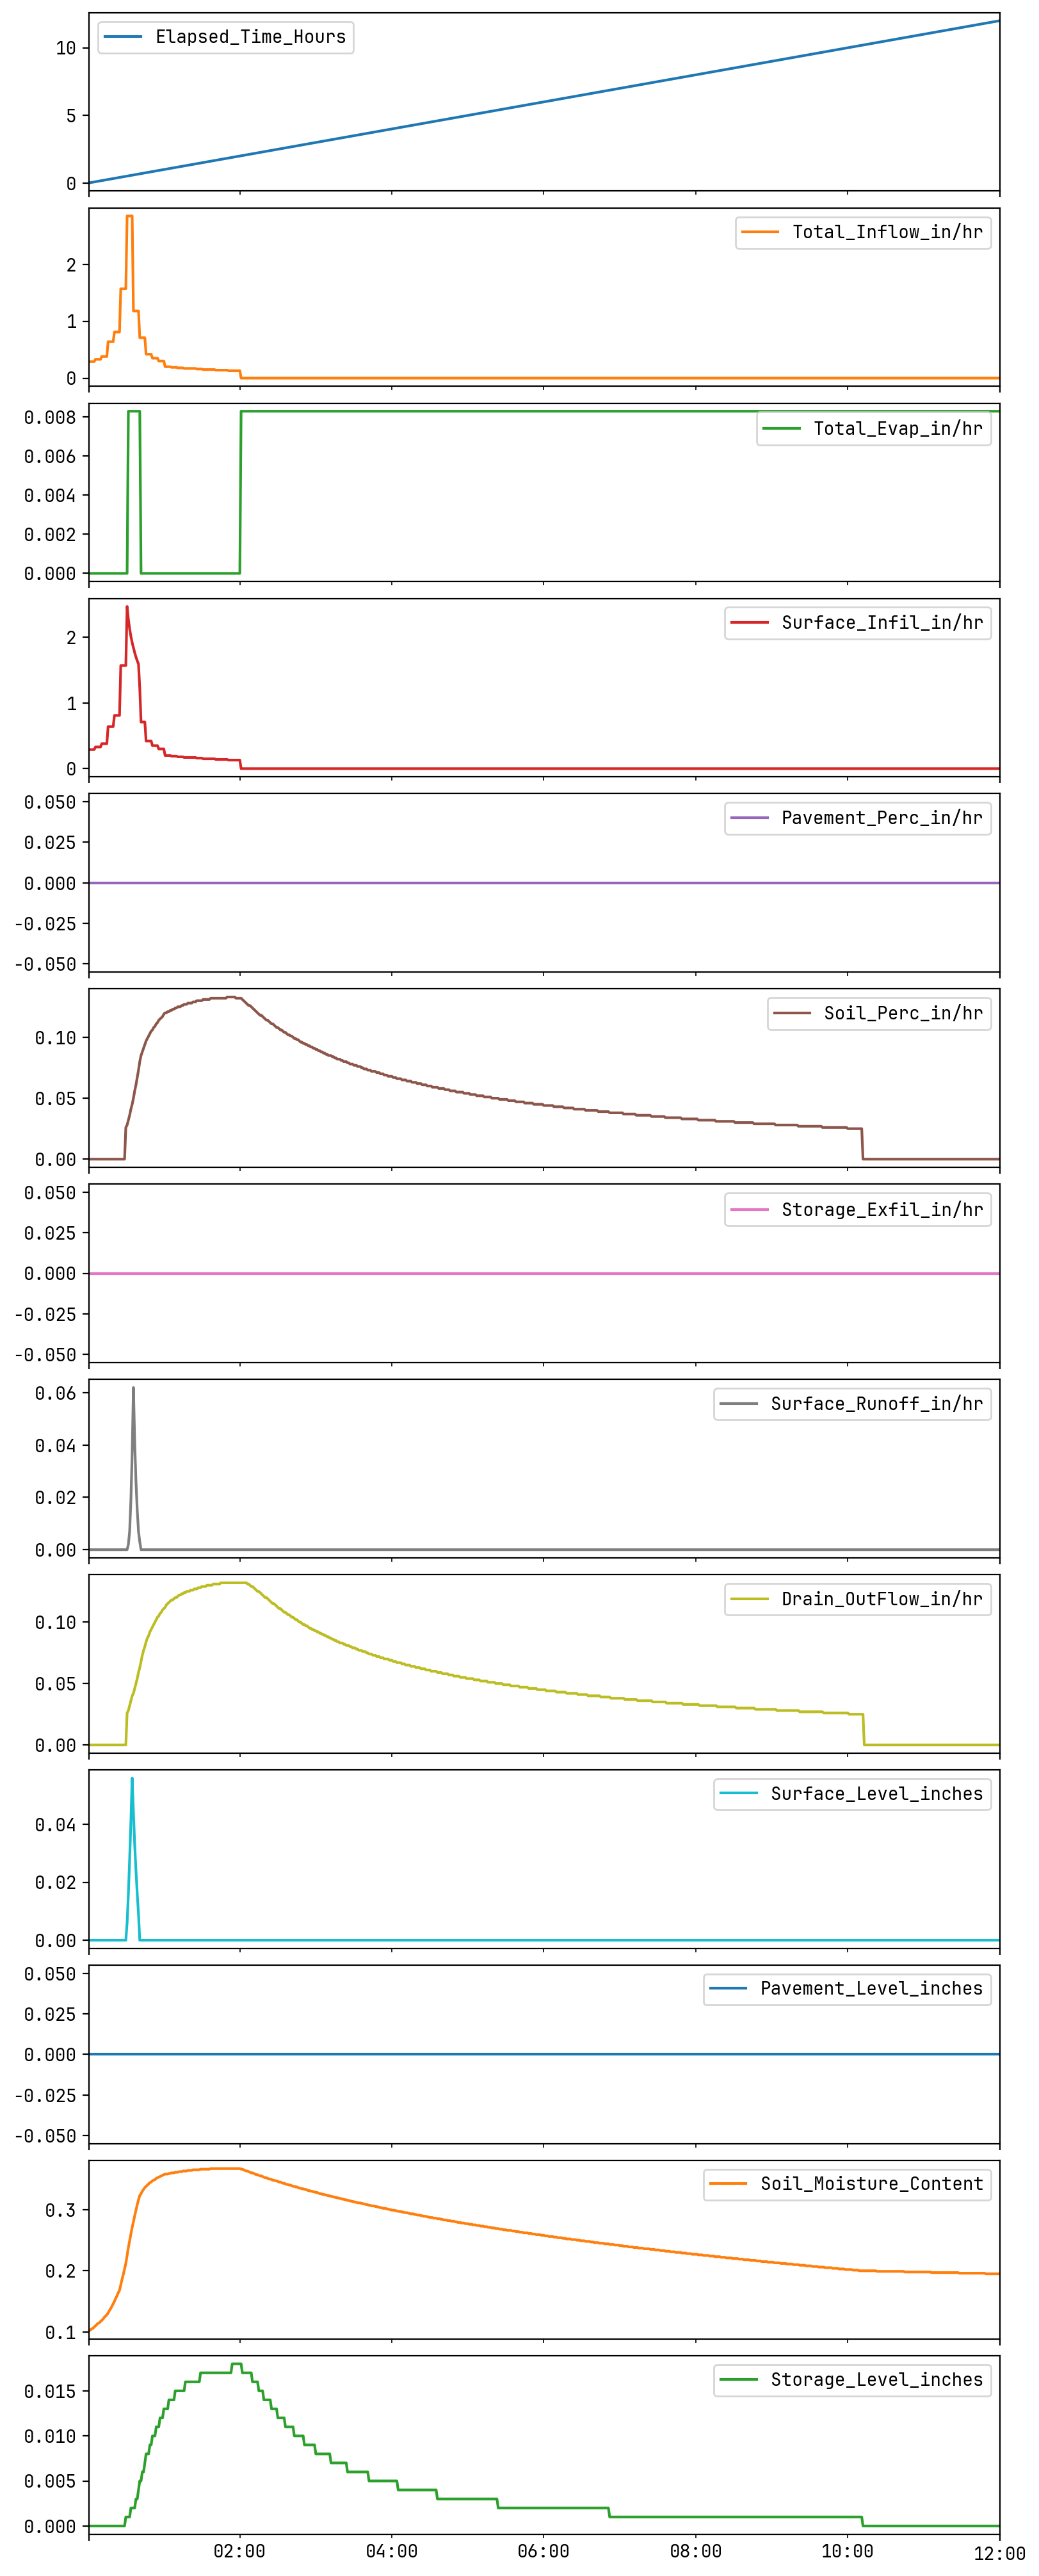

In [17]:
lid_rpt[('S5', 'GreenRoof')].plot(subplots=True, figsize=(8, 20))

To determine the effect that LID usage has on reducing runoff from this subdivision:
1. From the last run made with LID controls present view the Status Report to determine the volume of surface runoff produced (see the Runoff Quantity Continuity table in the report). For the 2-yr design storm it should be around 0.23 inches.
2. Select the LID Controls category from the Project Browser and delete each of the controls except for the Swale.
3. Re-run the project and note the surface runoff value in the Status Report. For the 2-yr storm it should be 0.49 inches showing that the LID controls provided more than a 50% reduction in runoff.
4. To determine the LID impact for the other design storms included in the project, re-load the project file and repeat the steps above using a different choice of rainfall time series for the rain gage. For example, for the 10-yr design storm LID usage provides a 37% reduction in surface runoff.^